# Importing Libraries

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# loading dataset
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


**Data Loading**

# Data Cleaning

In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df[['person_age','person_emp_exp']].sort_values(by=['person_emp_exp'], ascending=False).head(20)

,person_age,person_emp_exp
81,144.0,125
32297,144.0,124
183,144.0,121
575,123.0,101
747,123.0,100
37930,116.0,93
38113,109.0,85
32416,94.0,76
32422,80.0,62
32506,84.0,61


In [ ]:
df = df[(df['person_age']<90) & (df['person_emp_exp']<=50)]

# Exploratory Data Analysis (EDA)

In [ ]:
# seperating numerical columns
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [ ]:
# unique values in each categories
for col in categorical:
    print(col, df[col].unique())

person_gender ['female' 'male']
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file ['No' 'Yes']


In [ ]:
# seperating numerical columns
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

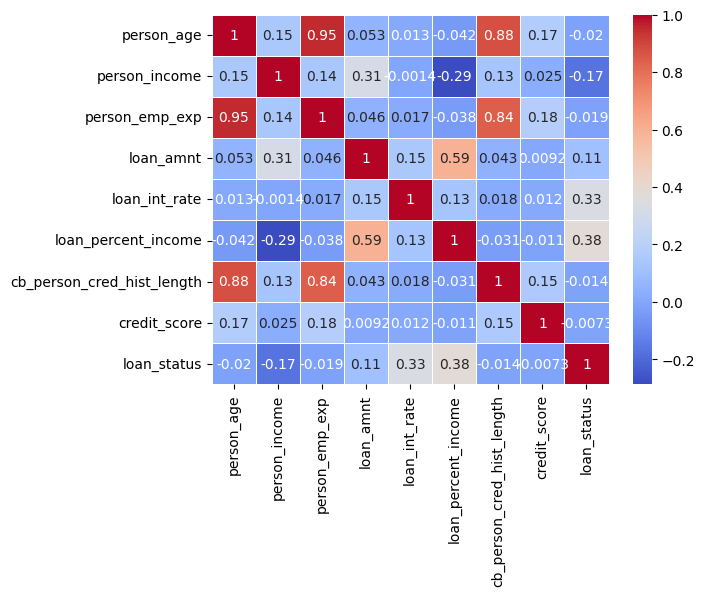

In [ ]:
correlations = df.corr(numeric_only=True)
correlations['loan_status'].sort_values(ascending=False)

sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

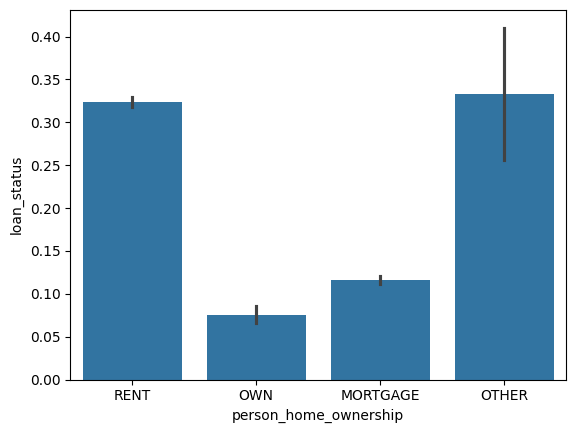

In [ ]:
sns.barplot(data=df, x='person_home_ownership', y='loan_status')
plt.show()

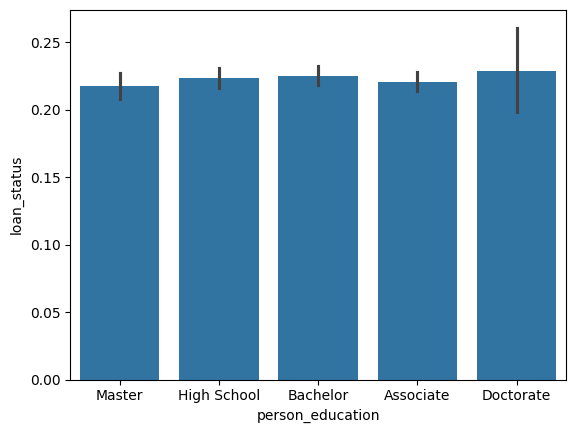

In [ ]:
sns.barplot(data=df, x='person_education', y='loan_status')
plt.show()

In [ ]:
def mutual_info_loan_score(series):
    return mutual_info_score(series, df.loan_status)

In [ ]:
# MI score with each category
mi = df[categorical].apply(mutual_info_loan_score)
mi.sort_values(ascending=False).round(5)

,0
previous_loan_defaults_on_file,0.19106
person_home_ownership,0.03503
loan_intent,0.01021
person_education,0.00002
person_gender,0.00000


# Feature Engineering

In [ ]:
df = df.drop(columns=['person_education', 'person_gender'])
df

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Train Test Split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(26992, 8998, 8998)

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_full_train

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,36.0,60837.0,16,MORTGAGE,5584.0,EDUCATION,11.52,0.09,9.0,608,Yes,0
1,28.0,63835.0,6,RENT,5000.0,HOMEIMPROVEMENT,13.48,0.08,7.0,669,No,0
2,29.0,116411.0,7,MORTGAGE,4500.0,VENTURE,6.76,0.04,10.0,641,Yes,0
3,30.0,724035.0,7,MORTGAGE,24623.0,PERSONAL,9.16,0.03,10.0,689,No,1
4,22.0,28467.0,0,MORTGAGE,3000.0,EDUCATION,8.94,0.11,4.0,647,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35985,26.0,65941.0,3,RENT,9600.0,HOMEIMPROVEMENT,16.02,0.15,6.0,696,No,1
35986,52.0,140486.0,28,MORTGAGE,12800.0,PERSONAL,9.99,0.09,23.0,689,No,0
35987,22.0,53912.0,1,MORTGAGE,6300.0,PERSONAL,12.29,0.12,3.0,588,Yes,0
35988,24.0,97315.0,0,MORTGAGE,5000.0,HOMEIMPROVEMENT,6.99,0.05,4.0,569,Yes,0


In [ ]:
y_full_train = df_full_train.loan_status.values

In [ ]:
y_full_train = df_full_train.loan_status.values
y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']
del df_full_train['loan_status']

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(max_iter=500)

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
loan_decision = (y_pred >= 0.5)

In [ ]:
(y_val == loan_decision).mean()

0.8828628584129806

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-1.13211101e-02 -9.67791856e-03  9.19761024e-05  2.74678065e-01
   4.24829320e-01 -3.66888484e-01  2.03790666e-01  2.42489607e-01
  -1.00415674e-01 -4.53671375e-01  1.33147913e-01 -5.35161177e-05
   7.45725764e-03 -5.38821831e-01  5.40338657e-03 -4.09468250e-01
   8.93020754e-01 -1.84787060e-05  2.84031970e+00 -2.89018563e+00]]
Intercept: [-0.04988611]


In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

model = LogisticRegression(solver='lbfgs', max_iter=500 )
model.fit(X_full_train, y_full_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]

loan_decision = (y_pred >= 0.5)
(loan_decision == y_test).mean()

0.8916425872416093

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='lbfgs', max_iter=1000, C=C, random_state= 42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    scores[C] = round(score, 3)
    print(f'C = {C}:\t Accuracy = {score}') # C = 0.01 is the best

C = 0.01:	 Accuracy = 0.8851967103800845
C = 0.1:	 Accuracy = 0.882640586797066
C = 1:	 Accuracy = 0.8828628584129806
C = 10:	 Accuracy = 0.8843076239164259
C = 100:	 Accuracy = 0.8827517226050233


In [ ]:
print(f'The best `C` is {max(scores, key=scores.get)}.')

The best `C` is 0.01.


# Model Evaluation

In [ ]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.5f' % (t, score))
    scores.append(score)

0.00 0.22416
0.05 0.88275
0.10 0.88275
0.15 0.88275
0.20 0.88275
0.25 0.88275
0.30 0.88275
0.35 0.88275
0.40 0.88275
0.45 0.88275
0.50 0.88275
0.55 0.88275
0.60 0.88275
0.65 0.88275
0.70 0.88275
0.75 0.88275
0.80 0.88275
0.85 0.88275
0.90 0.88275
0.95 0.88275
1.00 0.88275


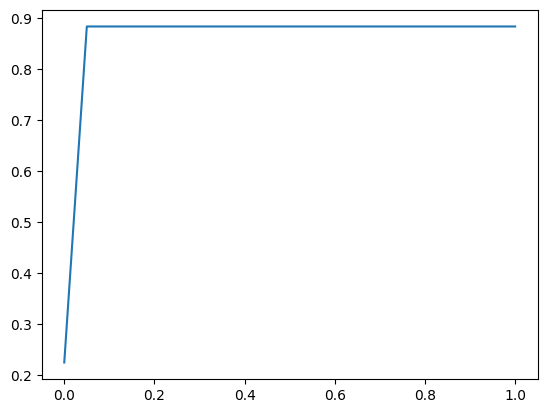

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

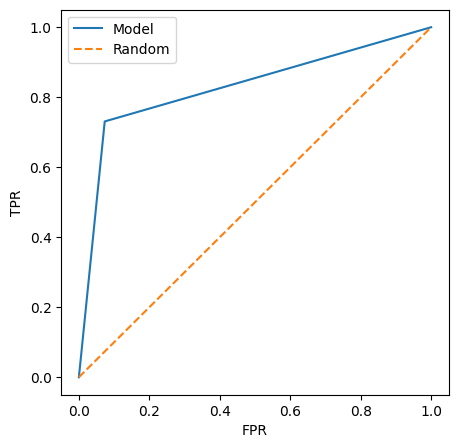

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

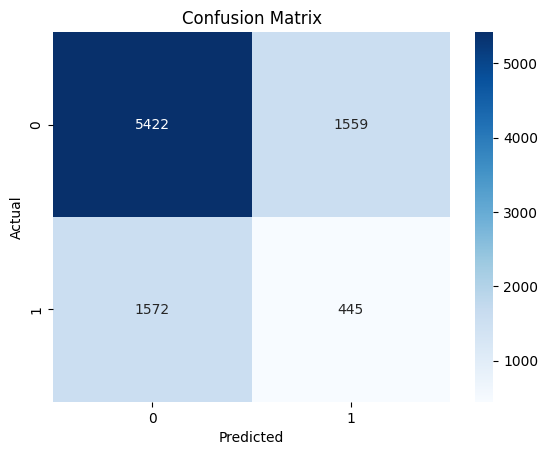

In [ ]:
# create confusion table
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, loan_decision)
cm

# visualize confusion table
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# create report for precision and recall
from sklearn.metrics import classification_report

print(classification_report(y_val, loan_decision))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6981
           1       0.22      0.22      0.22      2017

    accuracy                           0.65      8998
   macro avg       0.50      0.50      0.50      8998
weighted avg       0.65      0.65      0.65      8998

